Implementing <b>abi_kmeans_best_n_clusters</b>

In [39]:
import abi_kmeans_best_n_clusters

4


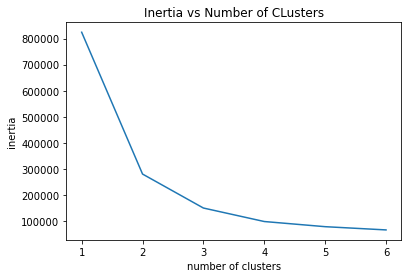

In [2]:
best_n_clusters = abi_kmeans_best_n_clusters.kmeans_best_n_clusters(
    '/Users/abishek/Desktop/DataScienceClasses/TILseg/abi_patches/TCGA-3C-AALI-01Z-00-DX1_T370.tif',
    6
    )

print(best_n_clusters)

Trying the same algorithm on our super patch now:

4


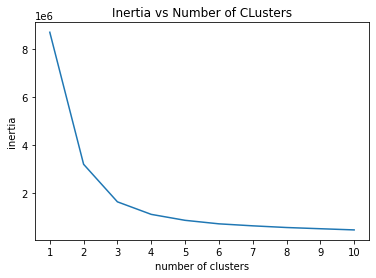

In [40]:
best_n_clusters = abi_kmeans_best_n_clusters.kmeans_best_n_clusters(
    '/Users/abishek/Desktop/DataScienceClasses/TILseg/abi_patches/super_patch.tif',
    10
    )

print(best_n_clusters)

Looks like 4 clusters is the optimal number of clusters for kmeans.

<b>This next part is for Ryan:</b> you might have to update the patch path

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [30]:
patch_path = '/Users/abishek/Desktop/DataScienceClasses/TILseg/abi_patches/TCGA-3C-AALI-01Z-00-DX1_T370.tif'

In [31]:
model = KMeans(n_clusters=8, max_iter=20,
                  n_init=3, tol=1e-3)
# Reads the patch into a numpy uint8 array    
fit_patch = plt.imread(patch_path) 
# Linearizes the array for R, G, and B separately and normalizes
# The result is an N X 3 array where N=height*width of the patch in pixels
fit_patch_n = np.float32(fit_patch.reshape((-1, 3))/255.)
# Fits the model to our linearized and normalized patch data 
model.fit(fit_patch_n)

KMeans(max_iter=20, n_init=3, tol=0.001)

In [32]:
# Predicting on the same patch we fit for now
pred_patch_n = fit_patch_n
labels = model.predict(pred_patch_n)

In [33]:
print(pred_patch_n.shape)
pred_patch_n

(12000000, 3)


array([[0.85490197, 0.7254902 , 0.8235294 ],
       [0.6784314 , 0.54901963, 0.64705884],
       [0.5882353 , 0.4627451 , 0.54901963],
       ...,
       [0.95686275, 0.8666667 , 0.9137255 ],
       [0.9607843 , 0.88235295, 0.92156863],
       [0.9411765 , 0.87058824, 0.9019608 ]], dtype=float32)

In [34]:
print(labels.shape)
labels

(12000000,)


array([4, 1, 3, ..., 0, 0, 0], dtype=int32)

In [35]:
fit_patch.shape[1]

4000

In [38]:
clustered_patch_labels = np.resize(labels, (fit_patch.shape[0], fit_patch.shape[1]))
clustered_patch_labels.shape

(3000, 4000)

More work:

In [1]:
import abi_pred_and_cluster
import abi_cluster_model_fitter

In [2]:
model_T370 = abi_cluster_model_fitter.cluster_model_fitter(
    patch_path='/Users/abishek/Desktop/DataScienceClasses/TILseg/abi_patches/T370/TCGA-3C-AALI-01Z-00-DX1_T370.tif',
    algorithm='KMeans',
    n_clusters=4)

In [3]:
abi_pred_and_cluster.pred_and_cluster(
    model=model_T370,
    dir_path='/Users/abishek/Desktop/DataScienceClasses/TILseg/abi_patches/T370')

In [4]:
model_super = abi_cluster_model_fitter.cluster_model_fitter(
    patch_path='/Users/abishek/Desktop/DataScienceClasses/TILseg/abi_patches/super_patch.tif',
    algorithm='KMeans',
    n_clusters=4)

In [5]:
abi_pred_and_cluster.pred_and_cluster(
    model=model_super,
    dir_path='/Users/abishek/Desktop/DataScienceClasses/TILseg/abi_patches/T370')

Check the overlays created by both models to compare training on the same image versus training on the super patch.